In [1]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
from utils import cross_plots

# imports

In [3]:
data = pd.read_csv("../data/train.csv", sep=';')
hidden_test = pd.read_csv("../data/hidden_test.csv", sep=';')

In [4]:
#To get total number of wells
print(f'Initial total number of data wells: {len(data.WELL.unique())}')

Initial total number of data wells: 98


## **Preprocessing**

In [5]:
all_wells = data.WELL.unique()
all_wells

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

# Modelling

In [6]:

lithology_colors  =   { 30000:    'darkorange',
                        65030:    '#228B22',
                        65000:    'grey',
                        80000:    'cyan',
                        74000:    'gold',
                        70000:    'lightseagreen',
                        70032:    'lawngreen',
                        88000:    'lightblue',
                        86000:    'tan',
                        99000:    '#FF4500',
                        90000:    'magenta',
                        93000:    '#000000'  }

lithology_labels =   {  30000: 'Sandstone',
                        65030: 'Sandstone/Shale',
                        65000: 'Shale',
                        80000: 'Marl',
                        74000: 'Dolomite',
                        70000: 'Limestone',
                        70032: 'Chalk',
                        88000: 'Halite',
                        86000: 'Anhydrite',
                        99000: 'Tuff',
                        90000: 'Coal',
                        93000: 'Basement'  }
lithology_numbers =   { 30000:   0 ,
                        65030:   1 ,
                        65000:   2 ,
                        80000:   3 ,
                        74000:   4 ,
                        70000:   5 ,
                        70032:   6 ,
                        88000:   7 ,
                        86000:   8 ,
                        99000:   9,
                        90000:   10,
                        93000:   11}

lith_num =          {  'Sandstone'      :   0 ,
                       'Sandstone/Shale':   1 ,
                       'Shale'     :   2 ,
                       'Marl'      :   3 ,
                       'Dolomite'      :   4 ,
                       'Limestone'      :   5 ,
                       'ChaLk'      :   6 ,
                       'Halite'     :   7 ,
                       'Anhydrite'      :   8 ,
                       'Tuff'      :   9,
                       'Coal'      :   10,
                       'Basement'      :   11   }

data['lithology'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_labels)
hidden_test['lithology'] = hidden_test['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_labels)
hidden_test['lith'] = hidden_test['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers)
data['lith'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers)

# 2D Scatter Plots

In [7]:
hidden_test.WELL.unique()

array(['15/9-23', '16/2-7', '16/7-6', '17/4-1', '25/10-9', '31/2-10',
       '31/2-21 S', '34/3-2 S', '35/11-5', '35/9-7'], dtype=object)

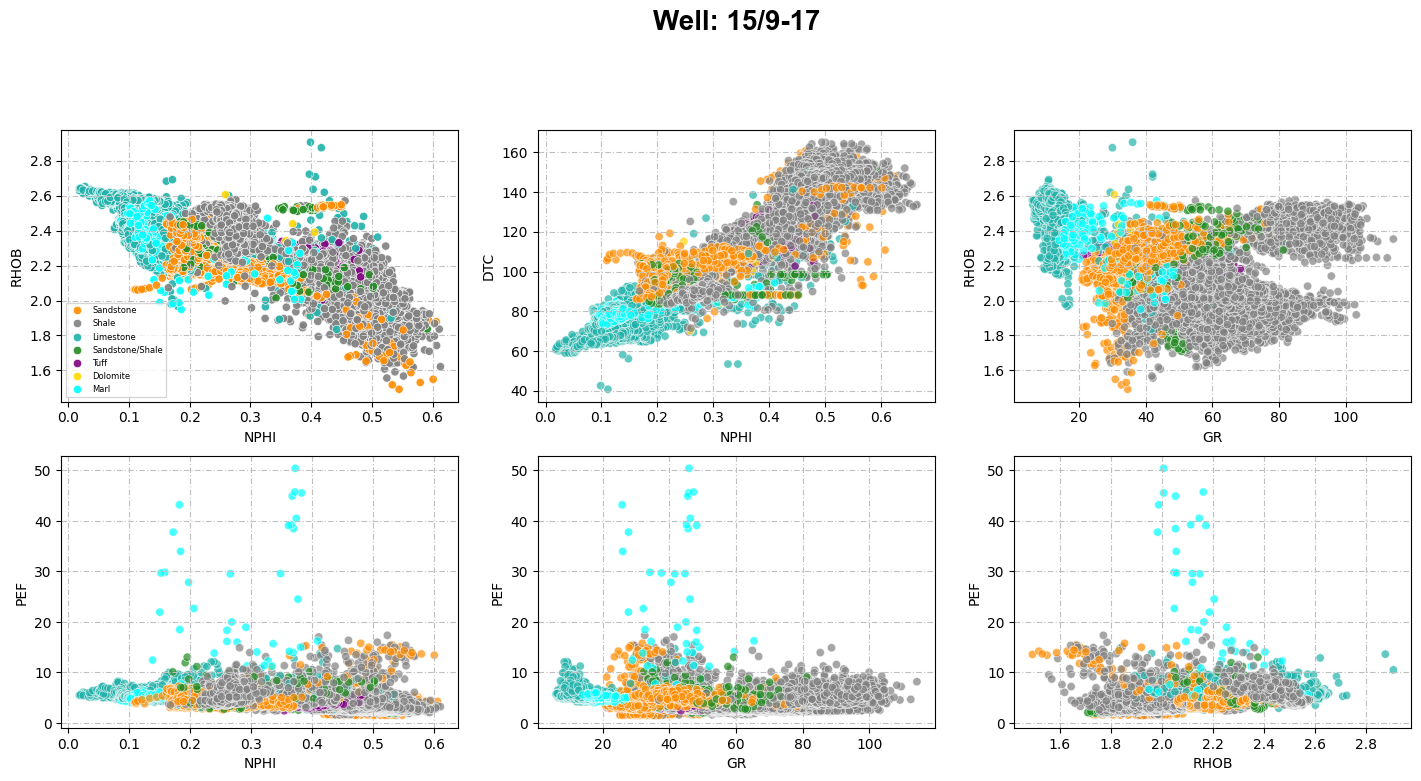

In [8]:
well_inx = 2
well_x =  data.loc[data.WELL== data.WELL.unique()[well_inx]]
cross_plots(well_x, 1000,3000, lim=False)

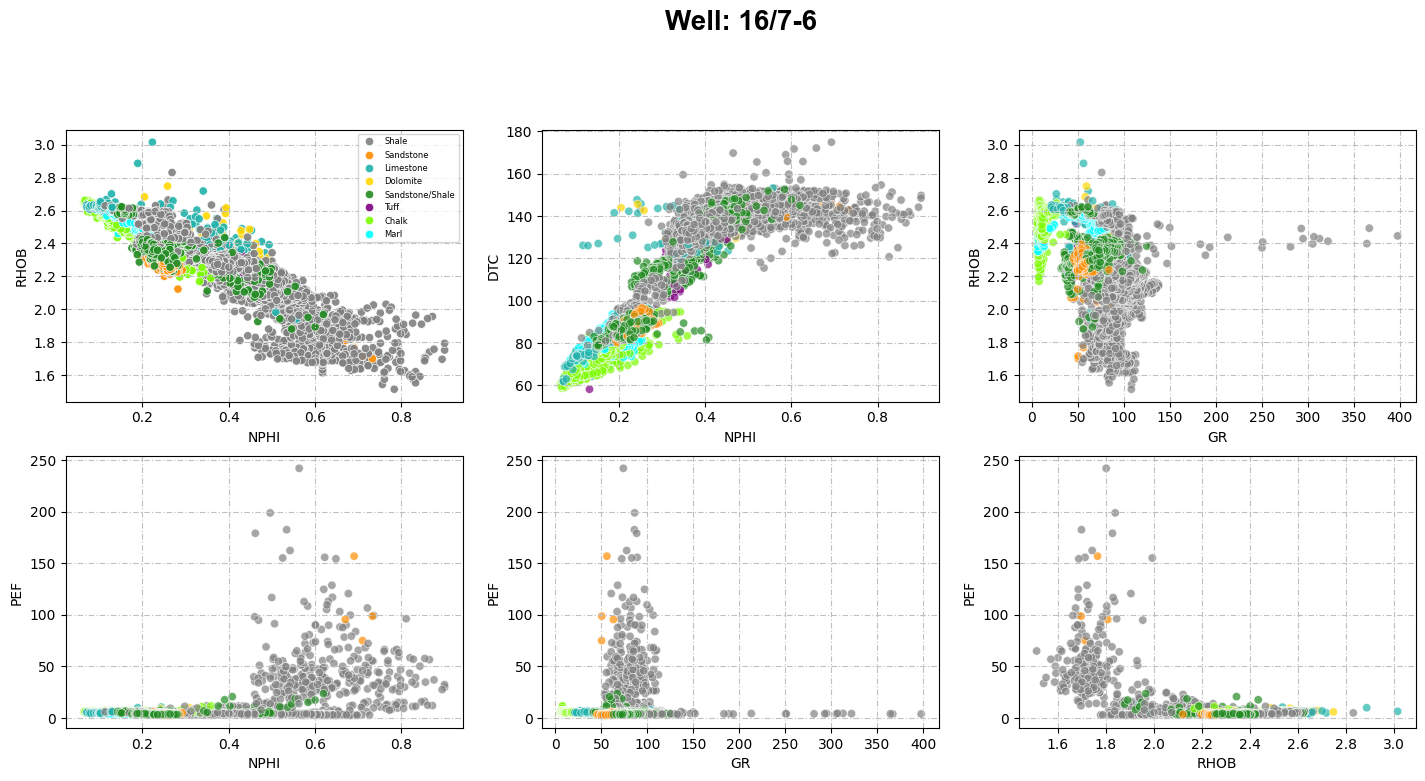

In [9]:
well_inx = 2
well_x =  hidden_test.loc[hidden_test.WELL== hidden_test.WELL.unique()[well_inx]]
cross_plots(well_x, 1000,3000, lim=False)

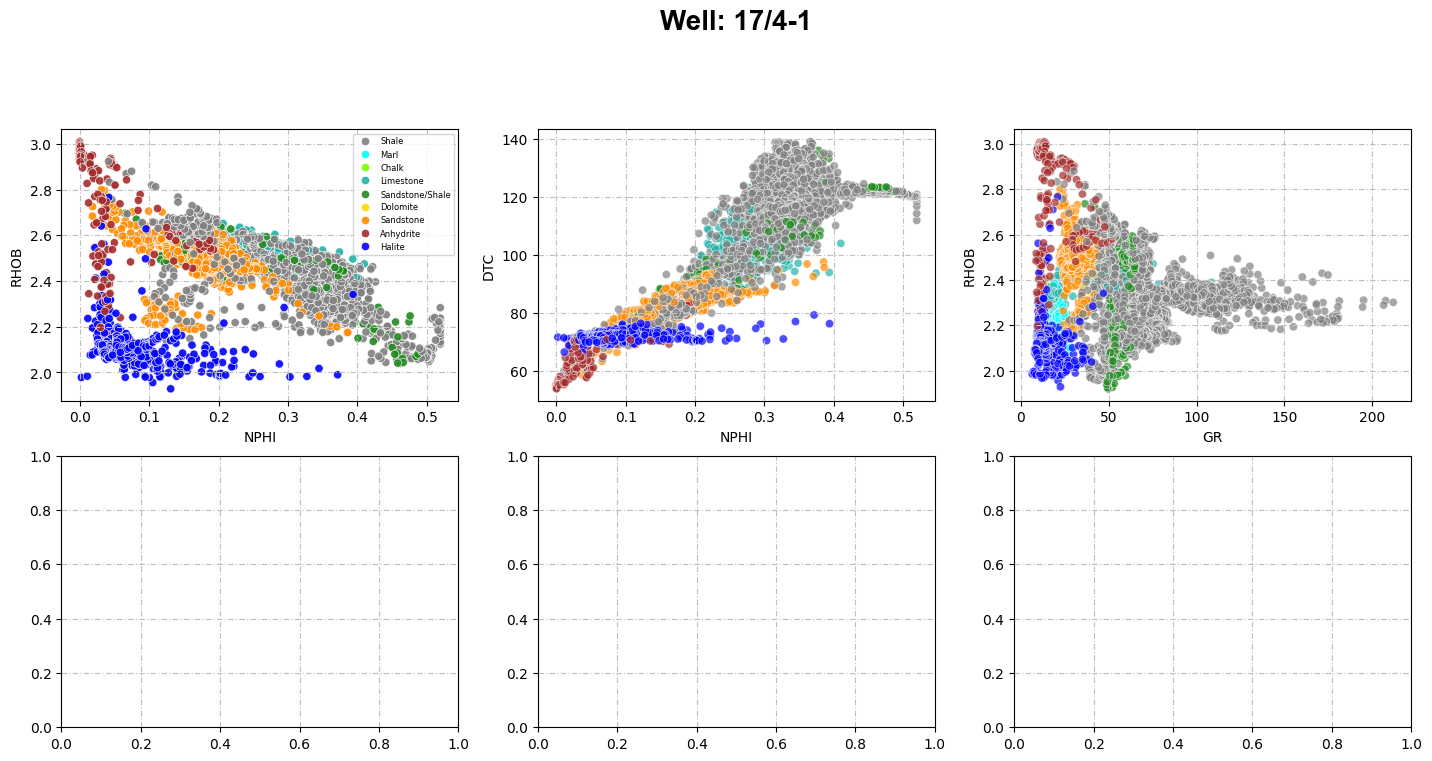

In [10]:
well_inx = 3
well_x =  hidden_test.loc[hidden_test.WELL== hidden_test.WELL.unique()[well_inx]]
cross_plots(well_x, 1000,3000, lim=False)

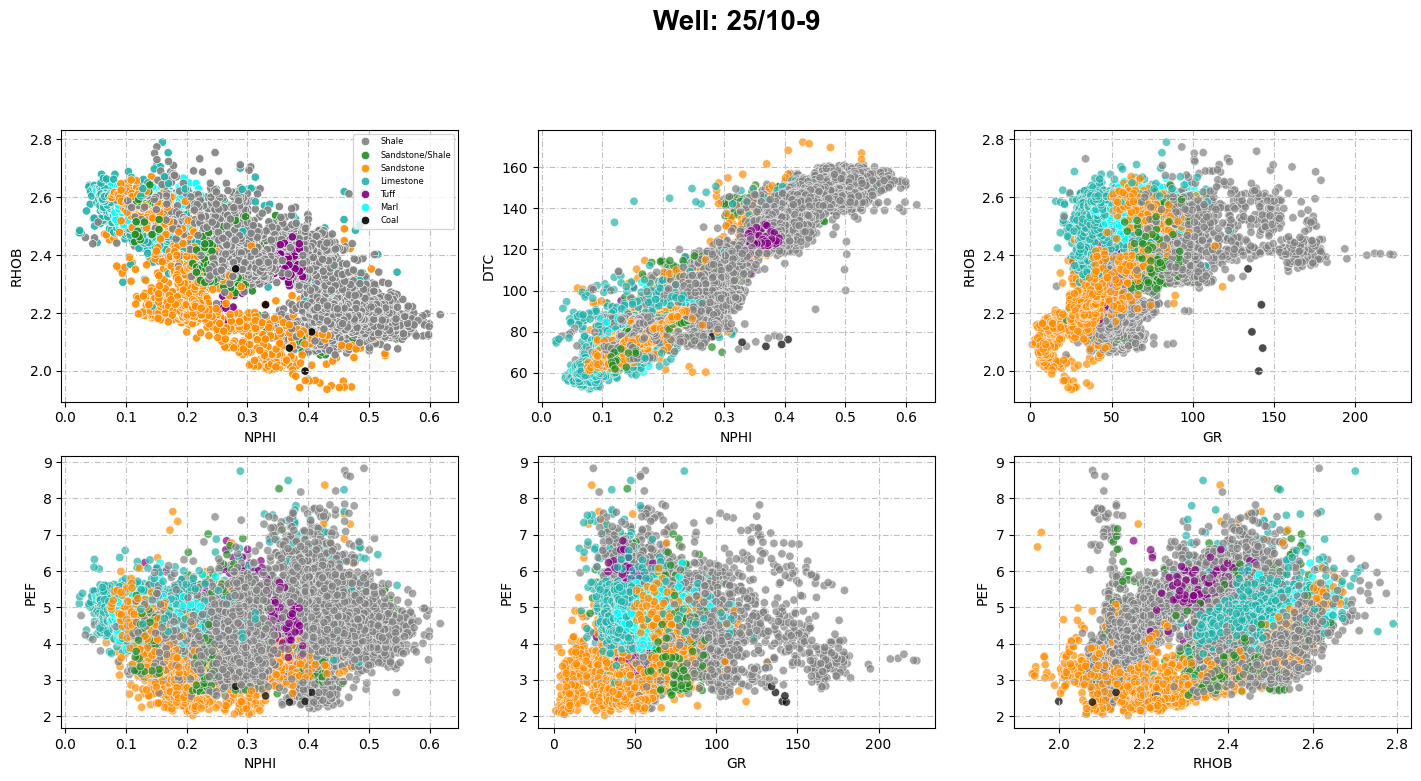

In [11]:

well_inx = 4
well_x =  hidden_test.loc[hidden_test.WELL== hidden_test.WELL.unique()[well_inx]]
cross_plots(well_x, 1000,3000, lim=False)

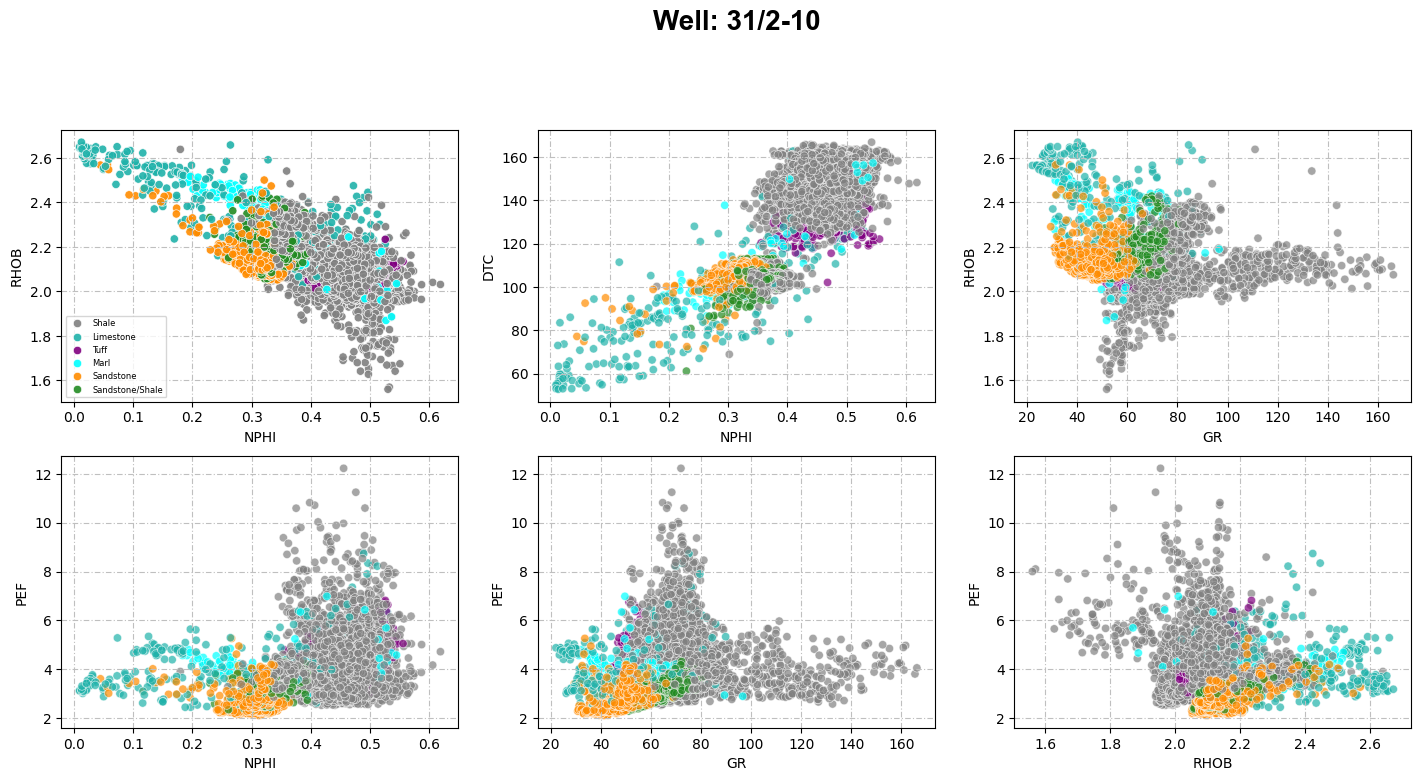

In [12]:

well_inx = 5
well_x =  hidden_test.loc[hidden_test.WELL== hidden_test.WELL.unique()[well_inx]]
cross_plots(well_x, 1000,3000, lim=False)

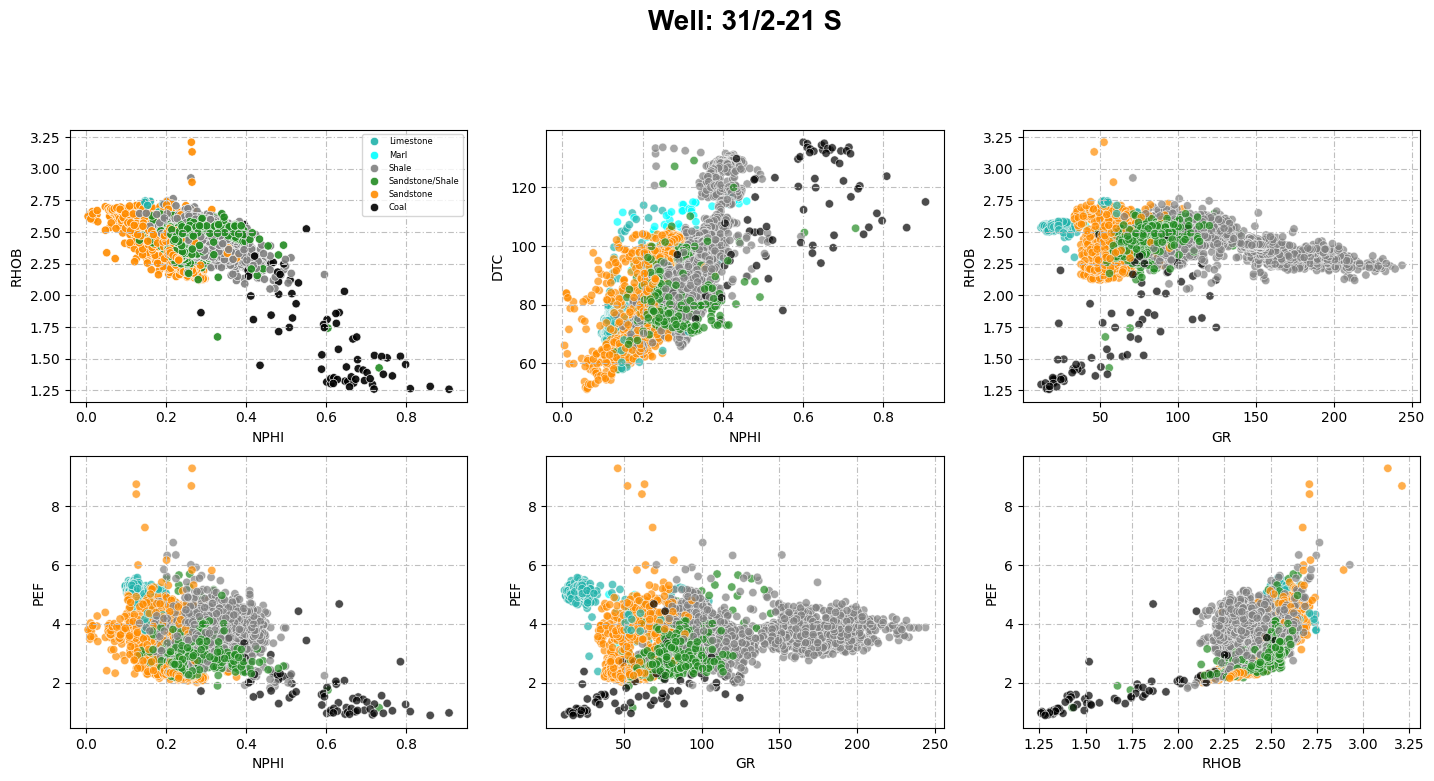

In [13]:

well_inx = 6
well_x =  hidden_test.loc[hidden_test.WELL== hidden_test.WELL.unique()[well_inx]]
cross_plots(well_x, 1000,3000, lim=False)

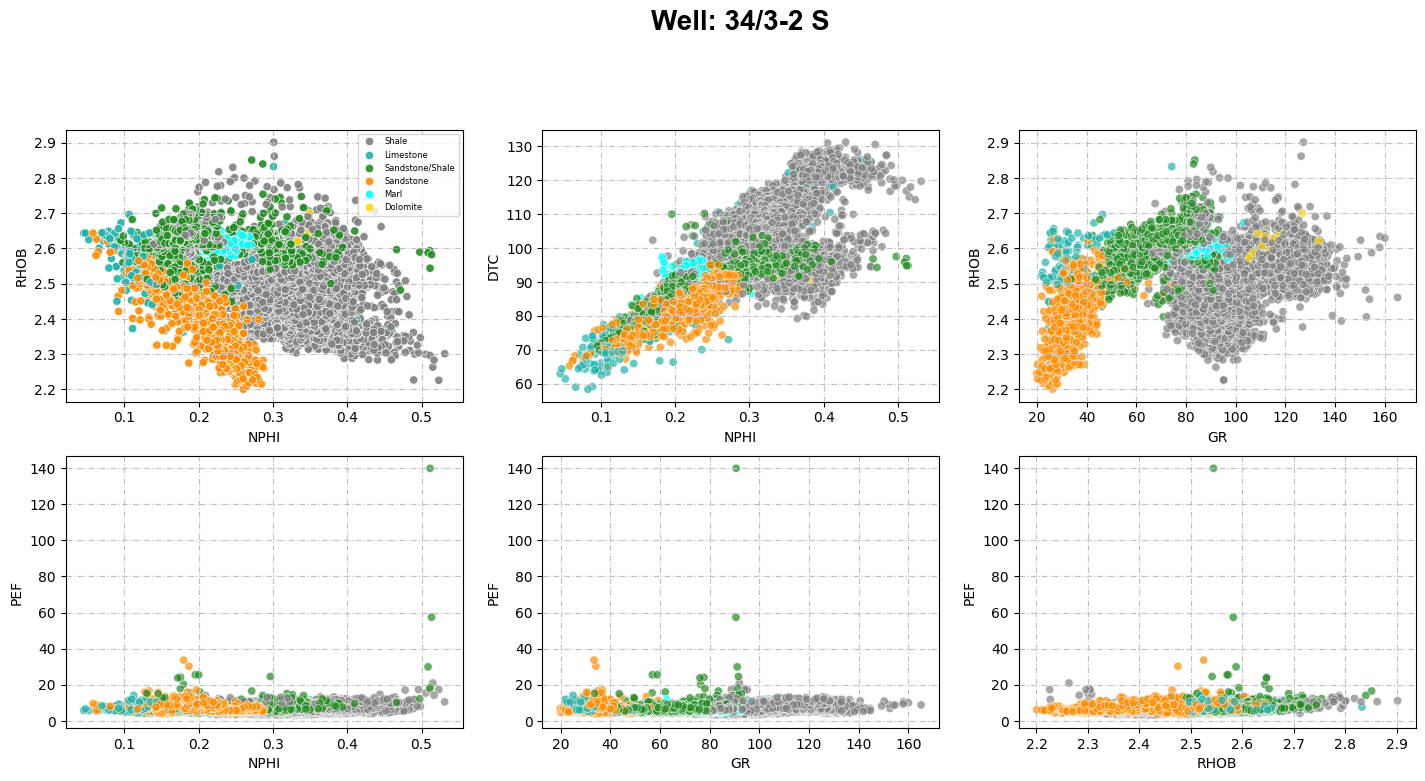

In [14]:
well_inx = 7
well_x =  hidden_test.loc[hidden_test.WELL== hidden_test.WELL.unique()[well_inx]]
cross_plots(well_x, well_x['DEPTH_MD'].min(), well_x['DEPTH_MD'].max(),  lim=False)

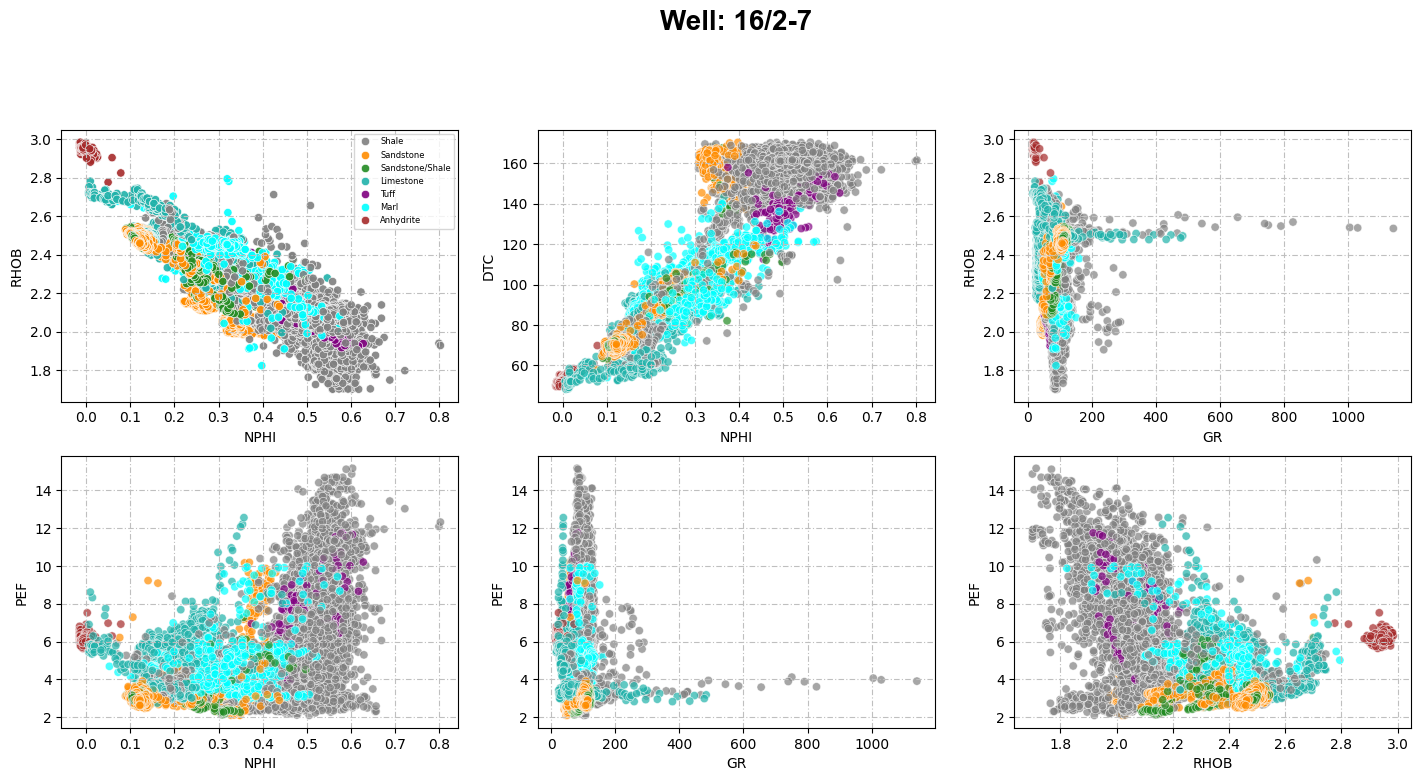

In [15]:
well_inx = 1
well_x =  hidden_test.loc[hidden_test.WELL== hidden_test.WELL.unique()[well_inx]]
cross_plots(well_x, well_x['DEPTH_MD'].min(), well_x['DEPTH_MD'].max(),  lim=False)

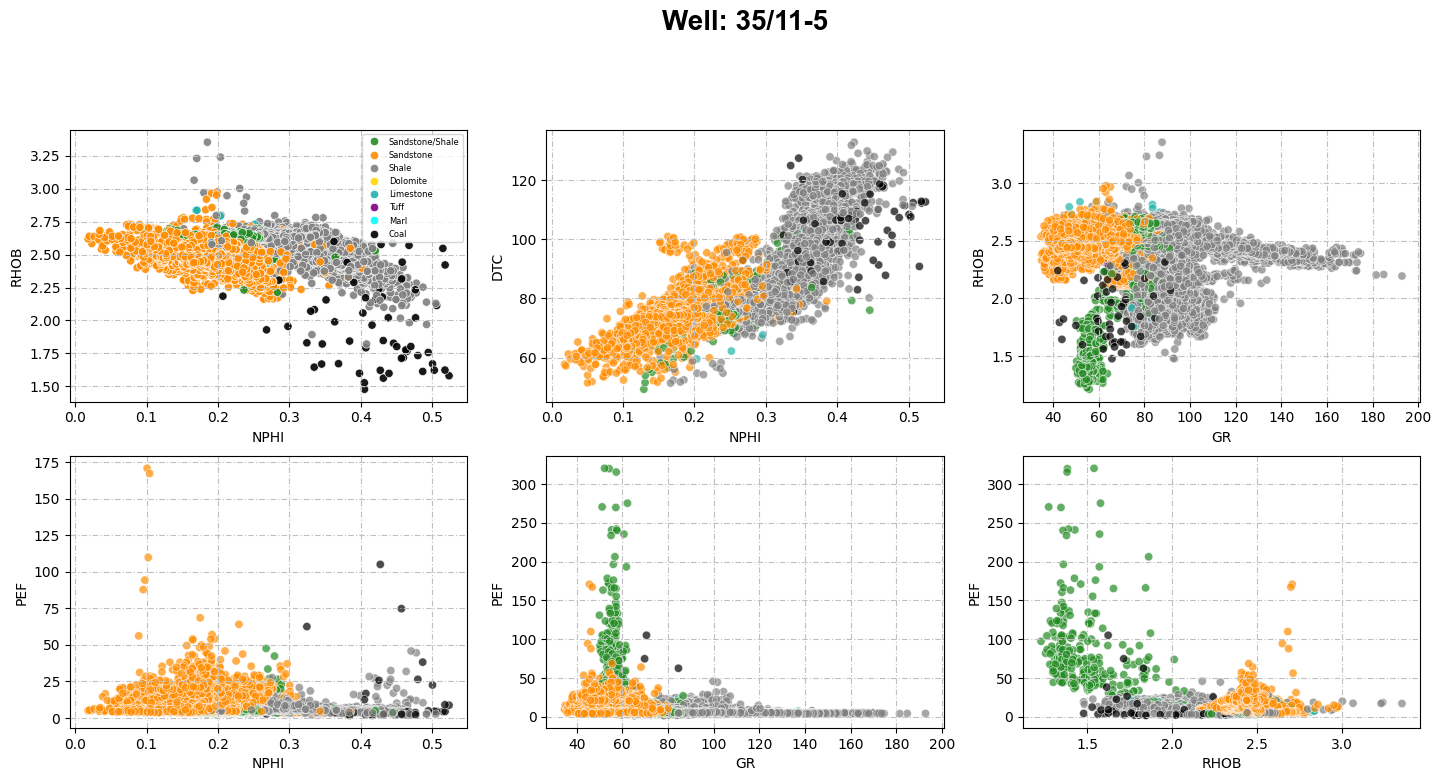

In [16]:
well_inx = 8
well_x =  hidden_test.loc[hidden_test.WELL== hidden_test.WELL.unique()[well_inx]]
cross_plots(well_x, well_x['DEPTH_MD'].min(), well_x['DEPTH_MD'].max(),  lim=False)

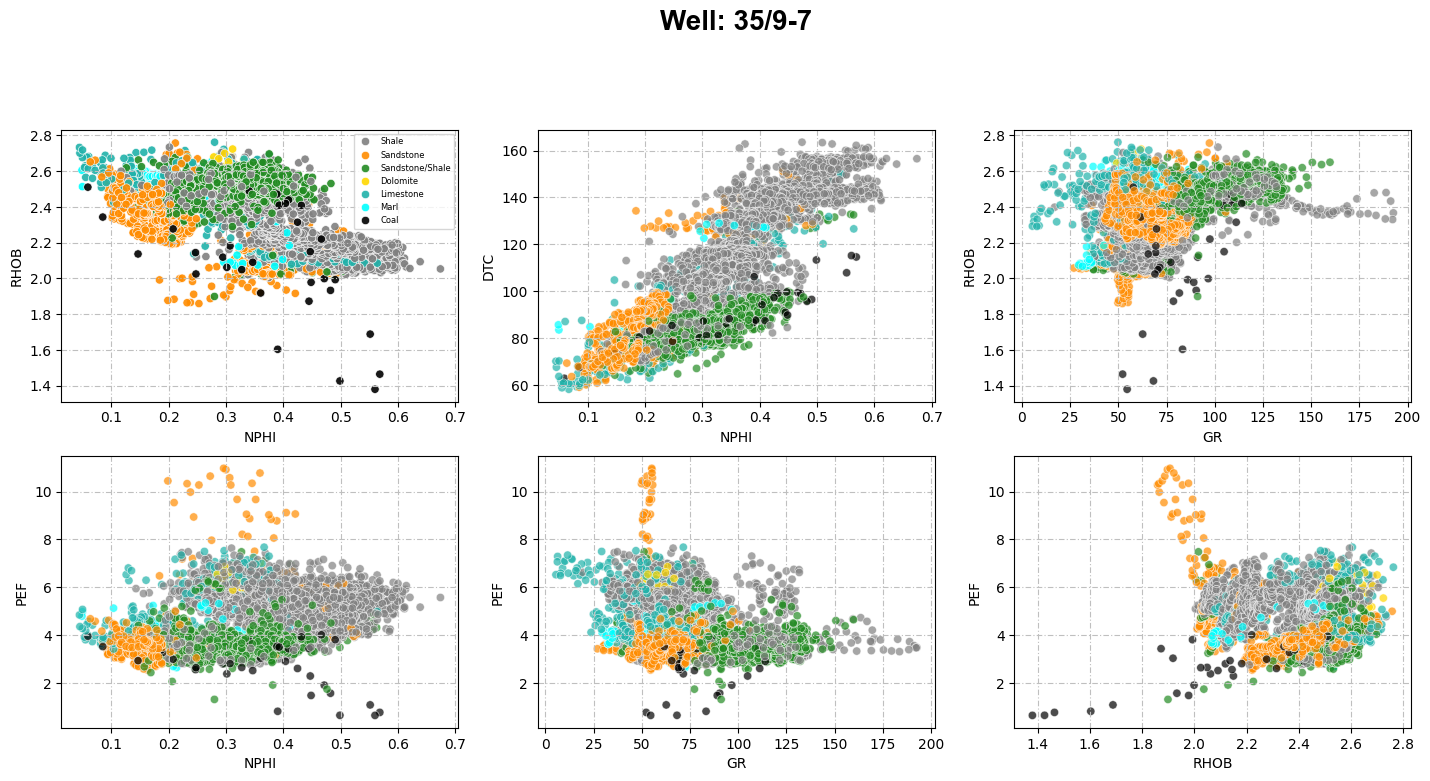

In [17]:
well_inx = 9
well_x =  hidden_test.loc[hidden_test.WELL== hidden_test.WELL.unique()[well_inx]]
cross_plots(well_x, well_x['DEPTH_MD'].min(), well_x['DEPTH_MD'].max(),  lim=False)

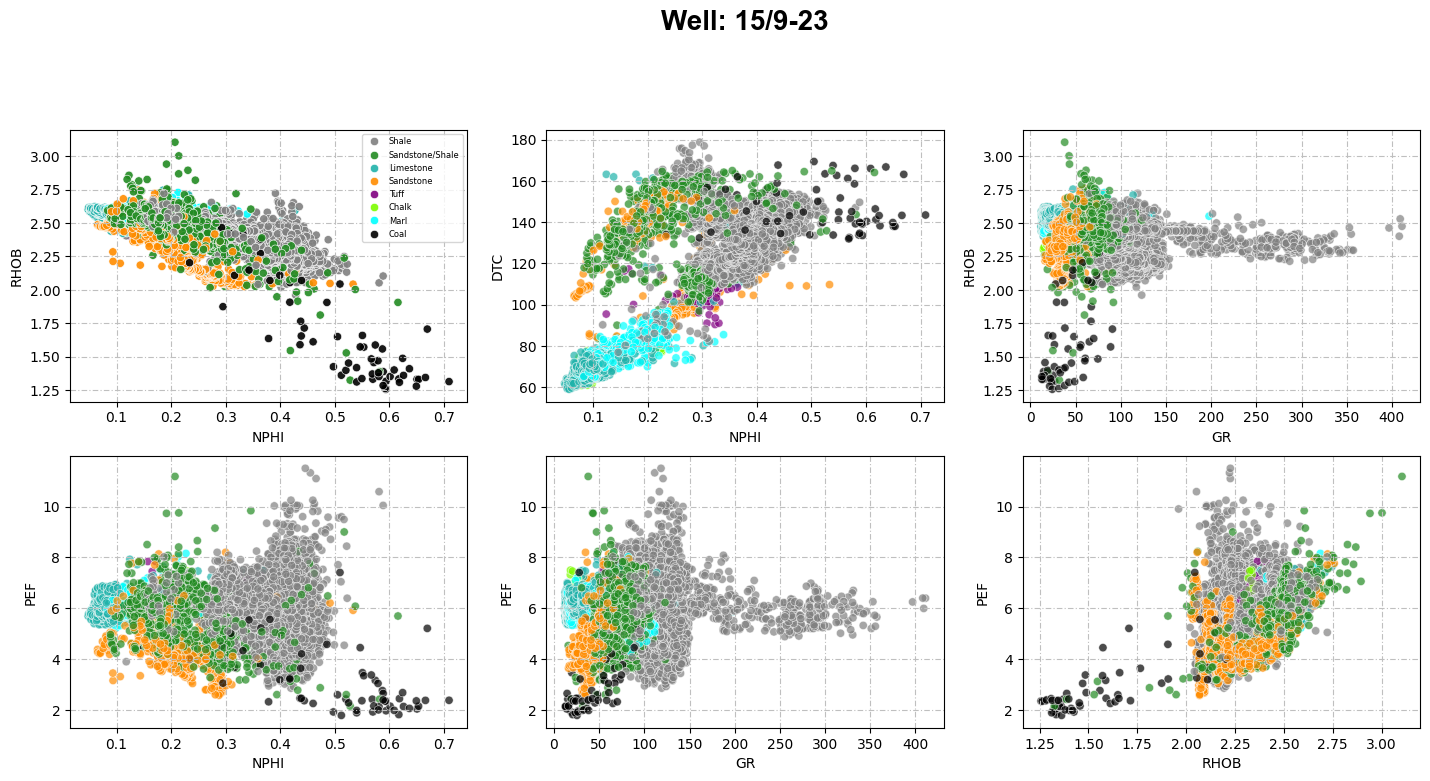

In [18]:
well_inx = 0
well_x =  hidden_test.loc[hidden_test.WELL== hidden_test.WELL.unique()[well_inx]]
cross_plots(well_x, well_x['DEPTH_MD'].min(), well_x['DEPTH_MD'].max(),  lim=False)

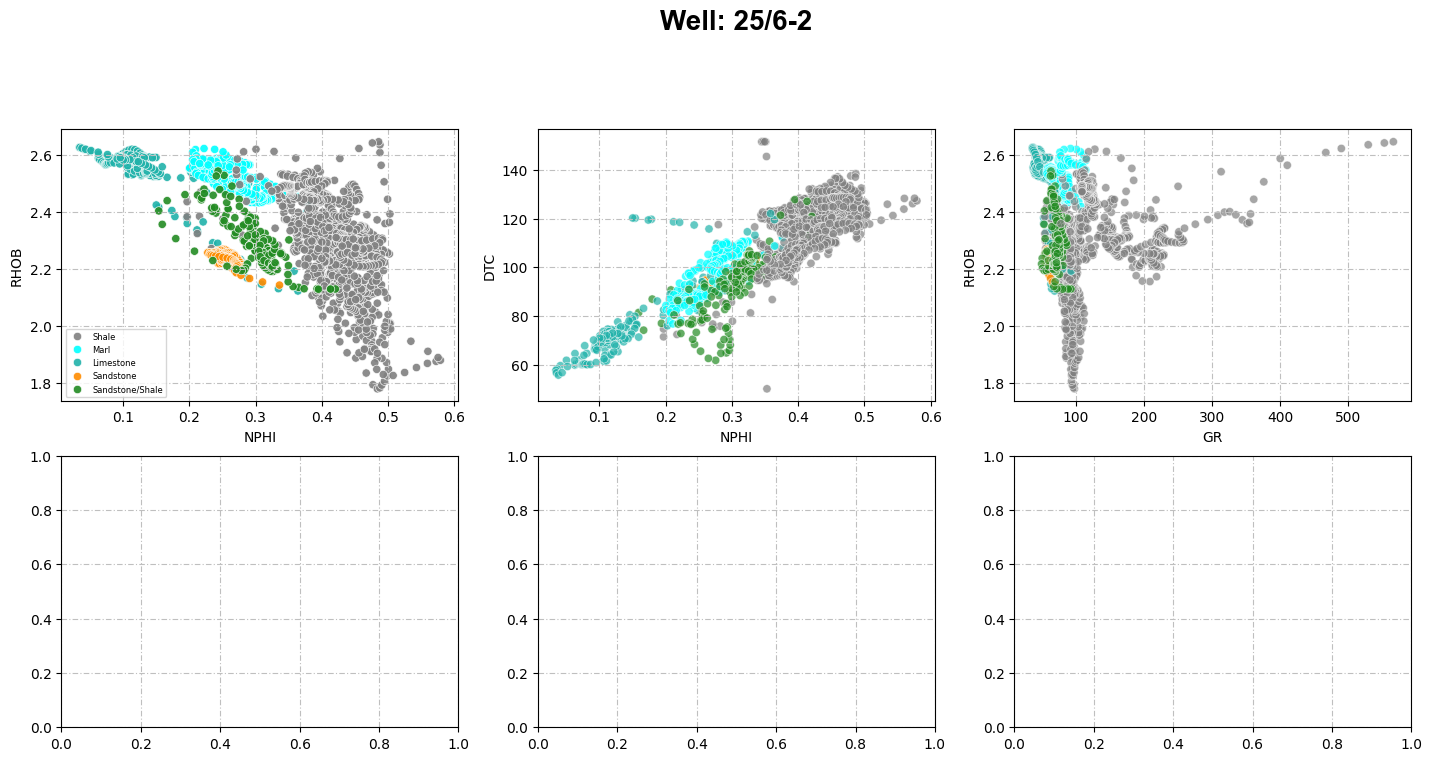

In [19]:
well_inx = 30
well_x =  data.loc[data.WELL== data.WELL.unique()[well_inx]]
cross_plots(well_x, well_x['DEPTH_MD'].min(), well_x['DEPTH_MD'].max(),  lim=False)

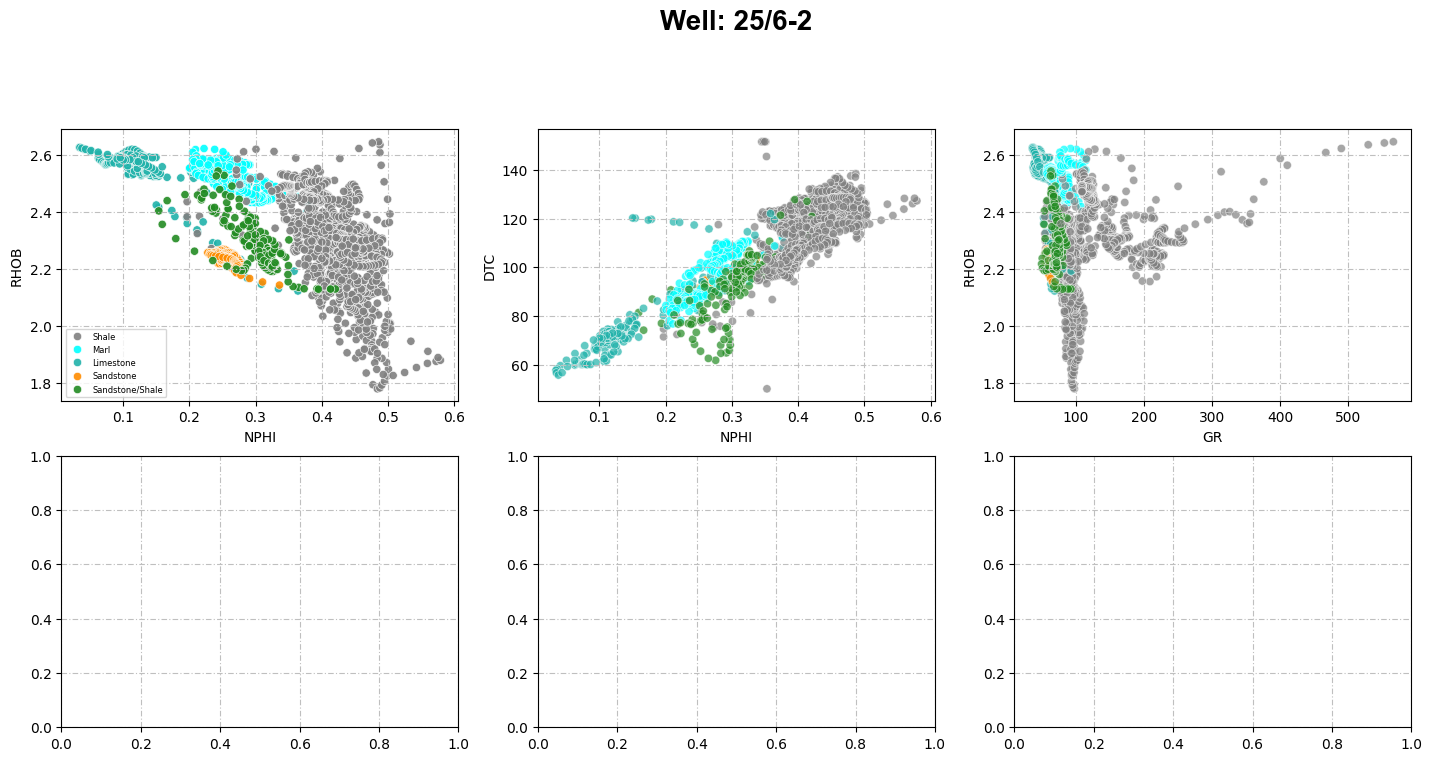

In [20]:
well_inx = 30
well_x =  data.loc[data.WELL== data.WELL.unique()[well_inx]]
cross_plots(well_x, well_x['DEPTH_MD'].min(), well_x['DEPTH_MD'].max(),  lim=False)

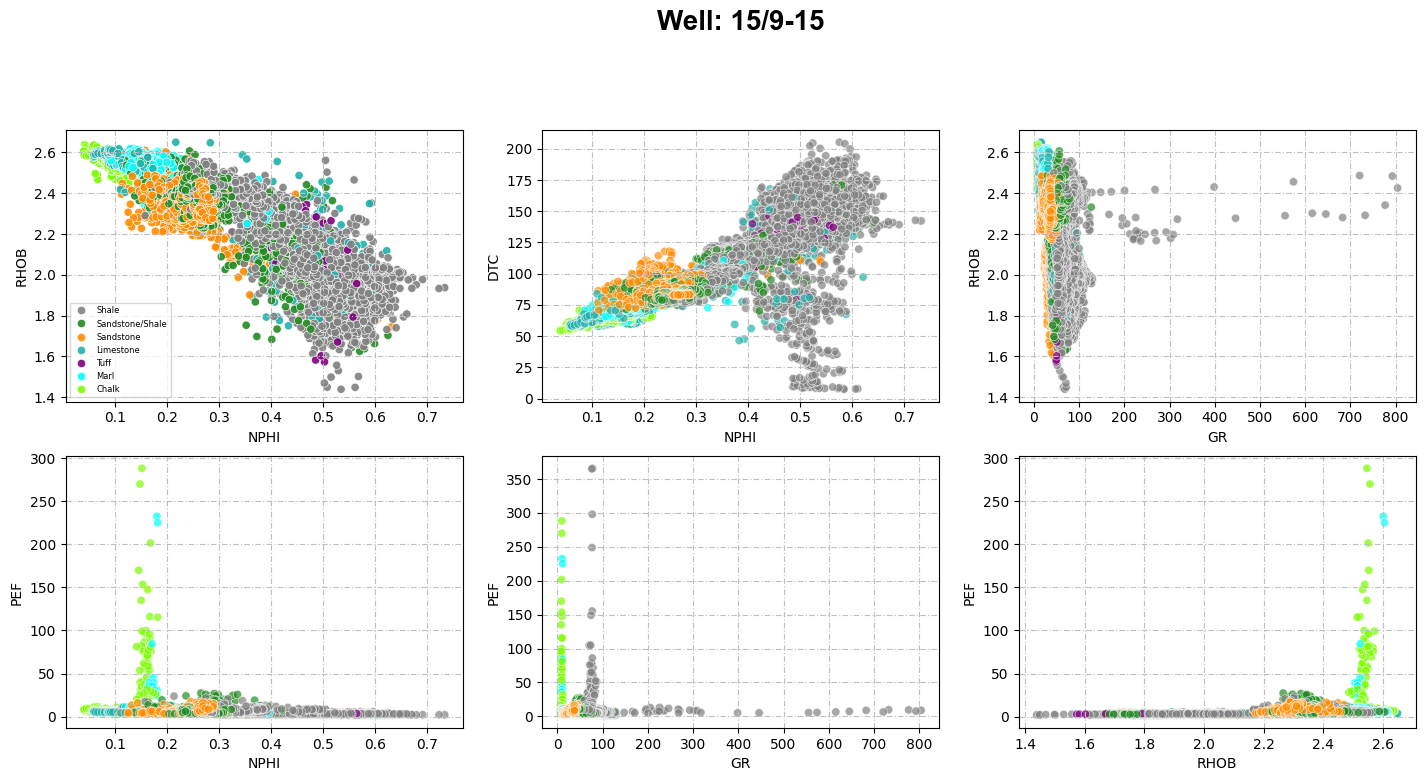

In [21]:
well_inx = 1
well_x =  data.loc[data.WELL== data.WELL.unique()[well_inx]]
cross_plots(well_x, well_x['DEPTH_MD'].min(), well_x['DEPTH_MD'].max(),  lim=False)

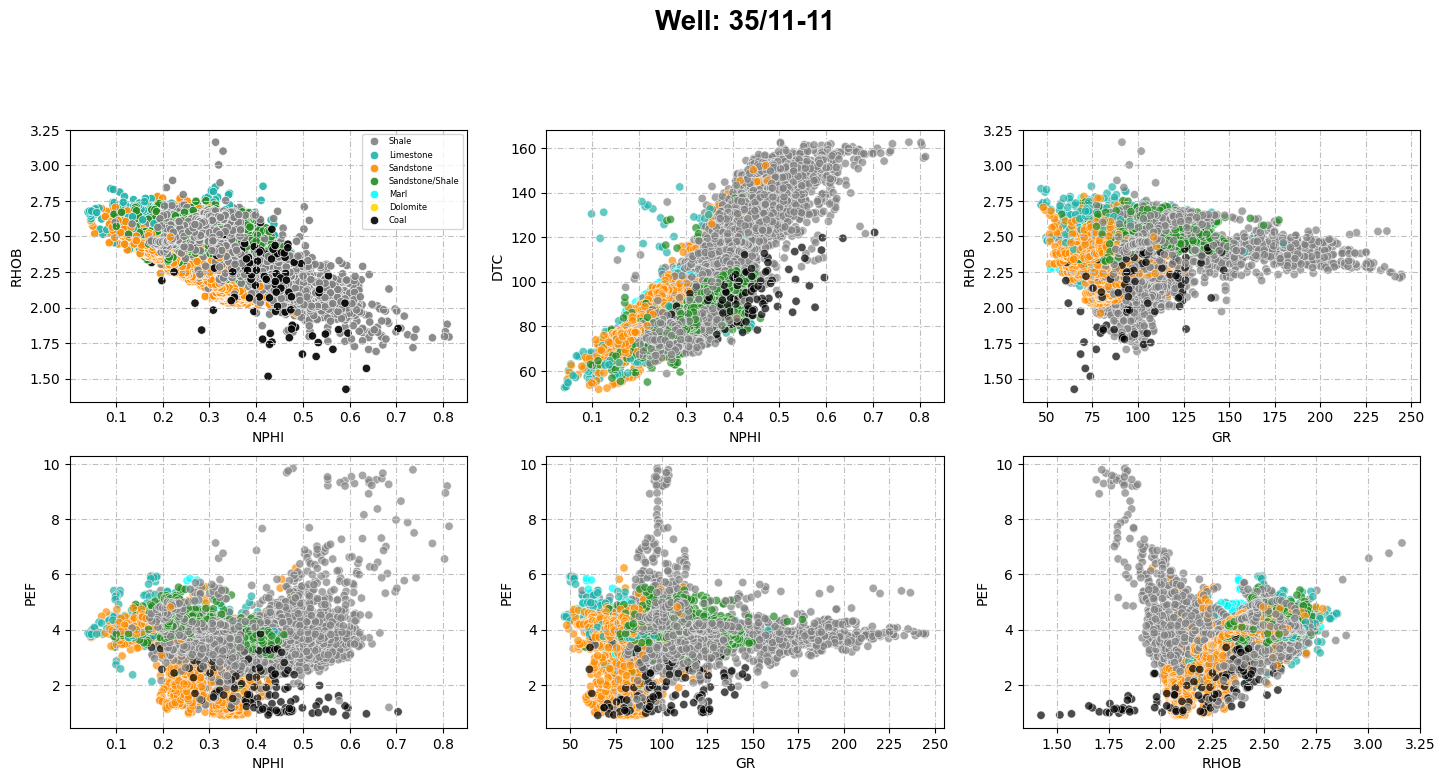

In [22]:
well_inx = 80
well_x =  data.loc[data.WELL== data.WELL.unique()[well_inx]]
cross_plots(well_x, well_x['DEPTH_MD'].min(), well_x['DEPTH_MD'].max(),  lim=False)

In [23]:
hidden_test.WELL.unique()

array(['15/9-23', '16/2-7', '16/7-6', '17/4-1', '25/10-9', '31/2-10',
       '31/2-21 S', '34/3-2 S', '35/11-5', '35/9-7'], dtype=object)